In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Define Business Problem
- melihat peluang penjualan sesuai raating
- melihat ratting sesuai category

### Goals
- apakah penjualan dengan ratting yang tinggi akan mendapatkan penjualan yang tinggi
- membuat rekomendasi category penjualan untuk mendapatkan rating yang tinggi

In [4]:
df = pd.read_csv('ecommerce.csv')
df

,Unnamed: 0,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender
0,0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.0,FREE Shipping,men
1,1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.0,FREE Shipping,men
2,2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,NaN,FREE Shipping,women
3,3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,80.0,FREE Shipping,men
4,4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,NaN,Eligible for FREE Shipping,men
...,...,...,...,...,...,...,...,...,...
604,175,Watches,JBW Delmare Men's 4 Genuine Diamonds Silicone ...,2624.0,575.99,72.0,92.0,FREE Shipping,men
605,176,Watches,Michael Kors Lexington Women's White Dial Stai...,762.0,564.98,28.0,76.0,FREE Shipping,women
606,177,Watches,Puma Casual Watch For Men Analog Stainless Ste...,679.0,262.98,67.0,94.0,FREE Shipping,men
607,178,Watches,"T5 Watch For Men [Rubber,Chronograph]-H3397G-B",440.0,115.49,40.0,86.0,Eligible for FREE Shipping,men


In [7]:
df.dtypes

Unnamed: 0             int64
category              object
product               object
Original_price       float64
price                float64
perc_of_unit_sold    float64
rating               float64
shpping_rate          object
gender                object
dtype: object

### Pengecekan Nilai Null

In [8]:
df.isnull().sum()

Unnamed: 0             0
category               0
product                0
Original_price        26
price                  0
perc_of_unit_sold     87
rating               182
shpping_rate          42
gender                28
dtype: int64

In [11]:
dfbersih=df.dropna()

In [13]:
dfbersih.isnull().sum()

Unnamed: 0           0
category             0
product              0
Original_price       0
price                0
perc_of_unit_sold    0
rating               0
shpping_rate         0
gender               0
dtype: int64

### semua nilai null di drop karna akan di pakai nilai yang tidak null

### pengecekan outliers

### outliers original price

In [15]:
dfbersih.describe()

,Unnamed: 0,Original_price,price,perc_of_unit_sold,rating
count,351.000000,351.000000,351.000000,351.000000,351.000000
mean,62.256410,929.212821,338.657123,62.698006,88.056980
std,49.494211,1818.035188,274.580470,24.431595,11.019834
min,0.000000,42.000000,21.400000,2.000000,20.000000
25%,23.000000,266.000000,125.990000,47.500000,84.000000
50%,47.000000,560.000000,251.490000,66.000000,90.000000
75%,92.500000,1026.000000,470.485000,84.000000,96.000000
max,178.000000,29970.000000,2115.490000,99.000000,100.000000


In [17]:
dfbersih.describe()['Original_price']

count      351.000000
mean       929.212821
std       1818.035188
min         42.000000
25%        266.000000
50%        560.000000
75%       1026.000000
max      29970.000000
Name: Original_price, dtype: float64

In [18]:
Q1 = dfbersih.describe()['Original_price']['25%']
Q3 = dfbersih.describe()['Original_price']['75%']
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR)
Lower_Fence = Q1 - (1.5 * IQR)
print(IQR)

760.0


In [19]:
dfbersih[(dfbersih['Original_price'] < Lower_Fence) | (dfbersih['Original_price'] > Upper_Fence)]

,Unnamed: 0,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender
431,2,Watches,JBW Mondrian Women's 16 Diamonds Rose Gold Dia...,2990.0,564.98,94.0,88.0,FREE Shipping,women
450,21,Watches,"Burberry Watch For Men,Stainless Steel Band, Q...",2865.0,1196.49,91.0,90.0,FREE Shipping,men
455,26,Watches,Akribos XXIV Men's Silver Dial Stainless Steel...,2610.0,209.49,81.0,100.0,FREE Shipping,men
462,33,Watches,Michael Kors Lexington Watch for Men - Analog ...,2420.0,648.97,25.0,88.0,FREE Shipping,men
463,34,Watches,Tissot Womens Round Black Dial Silicone Bracel...,2370.0,1307.99,14.0,80.0,FREE Shipping,women
484,55,Watches,JBW Alessandra for Women - Analog Stainless St...,5481.0,679.49,41.0,94.0,FREE Shipping,women
491,62,Watches,"JBW Watch For Men 16 Pieces Diamonds , Leather...",3731.0,679.98,90.0,84.0,FREE Shipping,men
495,66,Watches,JBW Jet Setter Men's 234 Diamonds Gold Dial Go...,29970.0,2115.49,98.0,72.0,FREE Shipping,men
498,69,Watches,JBW Watch for Unisex Studded with 12 diamonds ...,2730.0,452.49,72.0,86.0,FREE Shipping,Unisex
499,70,Watches,Fossil Grant Sport Men's Blue Dial Leather Ban...,2202.0,712.98,23.0,94.0,FREE Shipping,men


In [ ]:
### pengecekan outliers Price

In [20]:
dfbersih.describe()['price']

count     351.000000
mean      338.657123
std       274.580470
min        21.400000
25%       125.990000
50%       251.490000
75%       470.485000
max      2115.490000
Name: price, dtype: float64

In [21]:
Q1 = dfbersih.describe()['price']['25%']
Q3 = dfbersih.describe()['price']['75%']
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR)
Lower_Fence = Q1 - (1.5 * IQR)
print(IQR)

344.495


In [22]:
dfbersih[(dfbersih['Original_price'] < Lower_Fence) | (dfbersih['Original_price'] > Upper_Fence)]

,Unnamed: 0,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender
145,3,Eyewear,"Ray-Ban Aviator Classic Sunglasses for Men , R...",1050.0,308.00,81.0,96.0,FREE Shipping,men
146,4,Eyewear,Ray-Ban RB1971 914751 Square Sunglasses for Un...,997.0,444.99,57.0,96.0,FREE Shipping,Unisex
168,26,Eyewear,Ray-Ban Aviator Unisex Sunglasses - Rb3449-001...,1014.0,427.98,89.0,86.0,FREE Shipping,Unisex
172,30,Eyewear,Ray Ban Rectangle Sunglasses For Men - Gray Le...,1680.0,884.49,62.0,92.0,FREE Shipping,men
176,34,Eyewear,"Ray-Ban Sunglasses for Men, Black, 3548N",1286.0,576.99,78.0,98.0,FREE Shipping,men
...,...,...,...,...,...,...,...,...,...
600,171,Watches,Invicta Pro Diver Men's Black Dial Stainless S...,1181.0,413.98,22.0,90.0,FREE Shipping,men
601,172,Watches,JBW Victory Women's 16 Diamonds Mother of Pear...,5587.0,774.48,95.0,88.0,FREE Shipping,women
602,173,Watches,JBW Caden 0.08 ctw Diamond Men's Green Dial Ge...,1499.0,418.98,70.0,96.0,FREE Shipping,men
603,174,Watches,"JBW Laurel Watch for Women , Stainless Steel ,...",4110.0,706.99,53.0,92.0,FREE Shipping,women


In [24]:
dfbersih.describe()['perc_of_unit_sold']

count    351.000000
mean      62.698006
std       24.431595
min        2.000000
25%       47.500000
50%       66.000000
75%       84.000000
max       99.000000
Name: perc_of_unit_sold, dtype: float64

In [25]:
Q1 = dfbersih.describe()['perc_of_unit_sold']['25%']
Q3 = dfbersih.describe()['perc_of_unit_sold']['75%']
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR)
Lower_Fence = Q1 - (1.5 * IQR)
print(IQR)

36.5


In [26]:
dfbersih[(dfbersih['perc_of_unit_sold'] < Lower_Fence) | (dfbersih['perc_of_unit_sold'] > Upper_Fence)]

,Unnamed: 0,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender


In [27]:
dfbersih.describe()['rating']

count    351.000000
mean      88.056980
std       11.019834
min       20.000000
25%       84.000000
50%       90.000000
75%       96.000000
max      100.000000
Name: rating, dtype: float64

In [28]:
Q1 = dfbersih.describe()['rating']['25%']
Q3 = dfbersih.describe()['rating']['75%']
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR)
Lower_Fence = Q1 - (1.5 * IQR)
print(IQR)

12.0


In [29]:
dfbersih[(dfbersih['perc_of_unit_sold'] < Lower_Fence) | (dfbersih['perc_of_unit_sold'] > Upper_Fence)]

,Unnamed: 0,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender
16,16,Athletic Shoes,"Skechers GO WALK 5 Sneaker for Men , Size 43 E...",349.0,228.48,50.0,100.0,FREE Shipping,men
17,17,Athletic Shoes,Nike air Monarch IV Training Shoes for Men - B...,279.0,234.99,60.0,90.0,FREE Shipping,men
19,19,Athletic Shoes,Nike Tanjun Sneaker For Men (Black - 43 EU),349.0,284.49,61.0,88.0,FREE Shipping,men
29,29,Athletic Shoes,Nike Tanjun Sneaker For Women (White & Black -...,352.0,251.49,53.0,100.0,FREE Shipping,women
30,30,Athletic Shoes,Nike Shoes for Men Size 43 EU - Blue,319.0,258.98,61.0,100.0,FREE Shipping,men
...,...,...,...,...,...,...,...,...,...
599,170,Watches,Invicta Pro Diver Men's Black Dial Stainless S...,680.4,429.48,17.0,84.0,FREE Shipping,men
600,171,Watches,Invicta Pro Diver Men's Black Dial Stainless S...,1181.0,413.98,22.0,90.0,FREE Shipping,men
603,174,Watches,"JBW Laurel Watch for Women , Stainless Steel ,...",4110.0,706.99,53.0,92.0,FREE Shipping,women
605,176,Watches,Michael Kors Lexington Women's White Dial Stai...,762.0,564.98,28.0,76.0,FREE Shipping,women


In [31]:
### melihat penjualan per unit dengan rating

In [34]:
a=[pd.crosstab(index=dfbersih['rating'], columns='perc_of_unit_sold', values=dfbersih['rating'], aggfunc='sum')]
a

[col_0   perc_of_unit_sold
 rating                   
 20.0                 20.0
 40.0                120.0
 50.0                 50.0
 56.0                 56.0
 60.0                360.0
 62.0                 62.0
 66.0                198.0
 68.0                204.0
 70.0                210.0
 72.0                 72.0
 74.0                444.0
 76.0                380.0
 78.0                624.0
 80.0               2080.0
 82.0               1558.0
 84.0               1596.0
 86.0               2752.0
 88.0               2992.0
 90.0               3870.0
 92.0               1748.0
 94.0               1692.0
 96.0               1728.0
 98.0                392.0
 100.0              7700.0]

### melihat jumlah ratting yang terdapat pada per category

In [42]:
b=[pd.crosstab(index=dfbersih['rating'], columns='category')]
b

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


[col_0   category
 rating          
 20.0           1
 40.0           3
 50.0           1
 56.0           1
 60.0           6
 62.0           1
 66.0           3
 68.0           3
 70.0           3
 72.0           1
 74.0           6
 76.0           5
 78.0           8
 80.0          26
 82.0          19
 84.0          19
 86.0          32
 88.0          34
 90.0          43
 92.0          19
 94.0          18
 96.0          18
 98.0           4
 100.0         77]

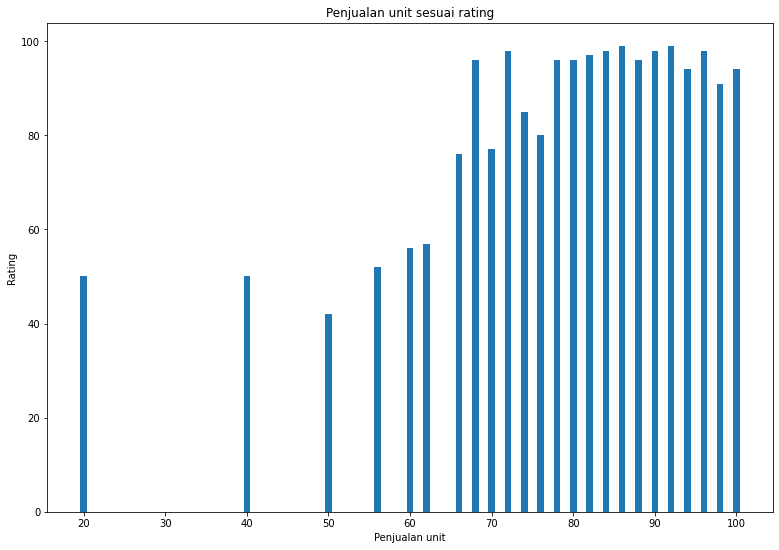

In [48]:
plt.figure(figsize=(13,9))
plt.bar(dfbersih['rating'], dfbersih['perc_of_unit_sold'])
plt.title('Penjualan unit sesuai rating')
plt.xlabel('Penjualan unit')
plt.ylabel('Rating')
plt.show()

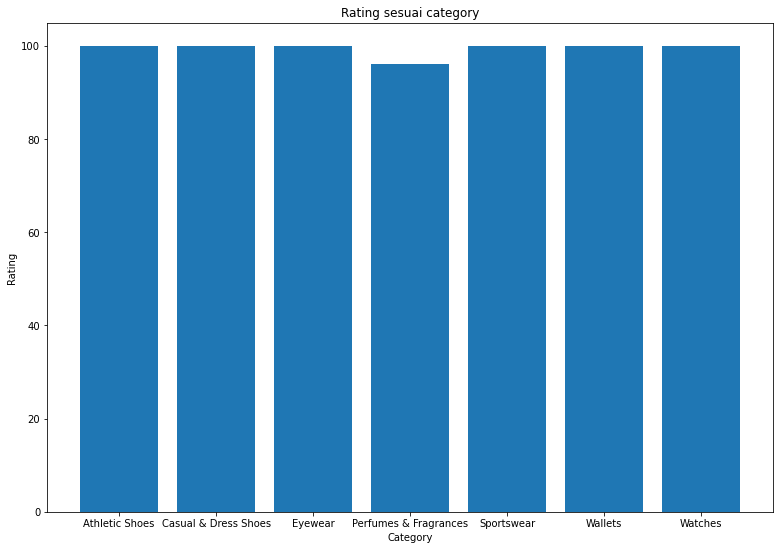

In [56]:
plt.figure(figsize=(13,9))
plt.bar(dfbersih['category'], dfbersih['rating'])
plt.title('Rating sesuai category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.show()

### hasil analisa
- rating yang tinggi cukup mempengaruhi penjualan tetapi yang memiliki rating 8.0 juga memiliki penjualan yang cukup tinggi
- kategori batang juga mempengaruhi dalam penilaian rating